## Another extension of (4.2) Example 2

In [1]:
%run imports.py

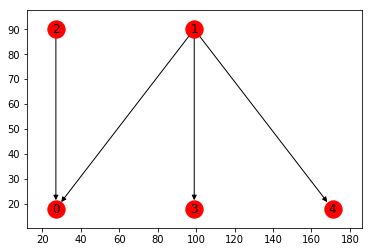

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([
    (1,0),
    (2,0),
    (1,3),
    (1,4)
])
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

Reverse the direction of edges connected to the root

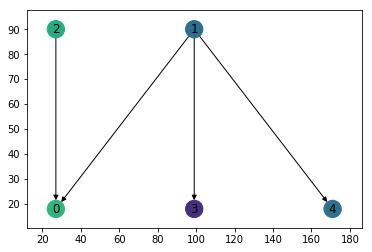

In [3]:
N = nx.number_of_nodes(G)
layout = graphviz_layout(G, prog='dot')
#init = np.random.normal(loc=0, scale=4, size=N)
init = np.random.rand(N)
nx.draw_networkx(G, pos=layout, node_color=init, vmin=0, vmax=1)

Simulate simple consensus

In [4]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

2

In [5]:
from scipy.integrate import solve_ivp

In [6]:
f1 = lambda t,x: np.asarray(L.dot(x))[0]
res1 = solve_ivp(fun=f1, t_span=[0,10], y0=init)

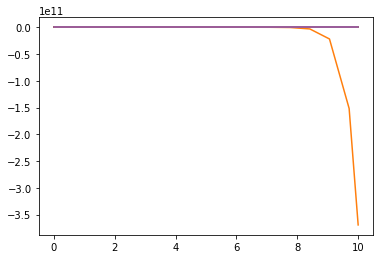

In [7]:
for i in np.arange(0,N):
    plt.plot(res1.t, res1.y[i,:])

In [8]:
res1.y[:,-1]

array([ 6.49406092e-01, -3.69180593e+11, -6.39926229e+02,  1.33574397e-01,
        3.77995002e-01])

### Symmetrization

In [9]:
from scipy.linalg import null_space
from scipy.linalg import solve_lyapunov

In [10]:
Q = null_space(null_space(L).transpose()).transpose()
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [11]:
f2 = lambda t,x: eqL.dot(x)
res2 = solve_ivp(fun=f2, t_span=[0,10], y0=init)

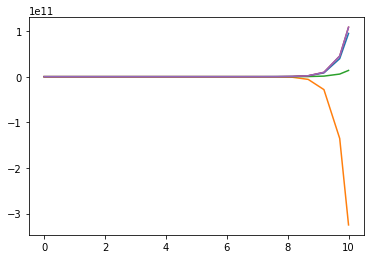

In [12]:
for i in np.arange(0,N):
    plt.plot(res2.t, res2.y[i,:], label=i)

Create undirected graph from the equivalent Laplacian

In [13]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,color=eqL[i,j])

In [14]:
edges = eqG.edges()
colors = [eqG[u][v]['color'] for u,v in edges]

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


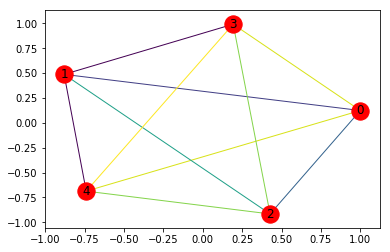

In [15]:
nx.draw_networkx(eqG, edge_color=colors)

In [16]:
nx.is_connected(eqG)

True

In [17]:
np.sum(eqL, axis=1)

array([-2.77555756e-16,  2.22044605e-16,  1.11022302e-16, -2.22044605e-16,
       -1.66533454e-16])

In [18]:
eqL

array([[ 0.64516129, -0.58064516, -0.4516129 ,  0.19354839,  0.19354839],
       [-0.58064516,  2.32258065, -0.19354839, -0.77419355, -0.77419355],
       [-0.4516129 , -0.19354839,  0.51612903,  0.06451613,  0.06451613],
       [ 0.19354839, -0.77419355,  0.06451613,  0.25806452,  0.25806452],
       [ 0.19354839, -0.77419355,  0.06451613,  0.25806452,  0.25806452]])

In [19]:
np.diag(eqL)

array([0.64516129, 2.32258065, 0.51612903, 0.25806452, 0.25806452])

In [20]:
res2.y[:,-1]

array([ 9.46087605e+10, -3.24741103e+11,  1.36382738e+10,  1.08247034e+11,
        1.08247034e+11])

Final result

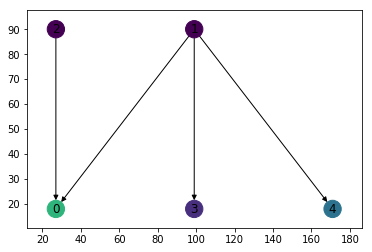

In [21]:
nx.draw_networkx(G, node_color = res1.y[:,-1], pos=layout, vmin=0, vmax=1)

In [22]:
np.linalg.matrix_rank(eqL)

2

In [23]:
negG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] < -1e-6):
            negG.add_edge(i,j,weight=1)

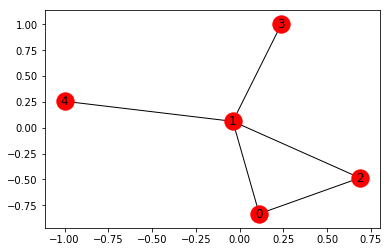

In [24]:
nx.draw_networkx(negG)

In [25]:
posG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] > 1e-6):
            posG.add_edge(i,j)

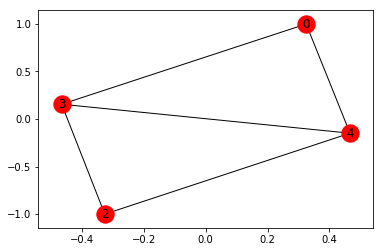

In [26]:
nx.draw_networkx(posG)